# 提升方法

提升方法是一种常用的统计学习方法，它通过改变训练样本的权重，学习多个分类器，并将这些分类器进行线性组合，提高分类的性能。

## AdaBoost

### 基本思路

在概率近似正确(PAC)学习的框架中：

**强可学习**：如果一个概念存在一个多项式学习算法能够学习它，且正确率很高，则称这个概念是强可学习的。

**弱可学习**：如果一个概念存在一个多项式学习算法能够学习它，且正确率仅比随机猜测的效果略好，则称这个概念为弱可学习的。

且强可学习与弱可学习是等价的，即在 PAC 学习的框架下，一个概念是强可学习的充分必要条件是这个概念是弱可学习的。

提升方法就是从弱学习方法出发，反复学习，得到一系列弱分类器，然后将这些弱分类器组合为强分类器。大多数提升方法是改变训练数据的概率分布，针对不同训练数据分布调用弱学习算法学习一系列弱分类器。

AdaBoost 算法正是将*弱学习算法*提升为*强学习算法*的代表。

### AdaBoost 算法

**输入**:训练数据集

$$T=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$$

其中 

$$x_i \in X = R^n,y_i \in Y={-1,1},i=1,2,...,N$$

弱学习算法；

**输出**:最终分类器G(x)

* 初始化训练数据的权值分布:

$$D_1=(w_11,..,w_1i,...,w_1N),w_{1i}=\frac{1}{N}, i=1,2,..,N$$

* 对 m = 1, 2,...,M

    * 适应具有权值分布 D_m 的训练数据集学习，得到基本分类器
    
    $$G_m(x):X \to {-1,+1}$$
    
    * 计算 G_m(x) 在训练数据集上的分类误差率( I(x) 为指示函数):
    
    $$e_m = \sum^N_{i=1}P(G_m(x_i)\ne y_i) = \sum^N_{i=1}w_{mi}I(G_m(x_i) \ne y_i)$$
    
    * 计算 G_m(x) 的系数(此处为自然对数)
    
    $$a_m= \frac{1}{2}log{\frac{1-e_m}{e_m}}$$
    
    * 更新训练数据集的权值分布
    
    $$D_{m+1}=(w_{m+1,1},...,w_{m+1,i},...,w_{m+1,N})$$
    
    $$w_{m+1,i}=\frac{w_{mi}}{Z_m}exp(-a_m y_i G_m(x_i)),i=1,2,...,N$$
    
    这里 Z_m 为规范因子
    
    $$Z_m = \sum^N_{i=1}{w_{mi}}exp(-a_m y_i G_m(x_i))$$
    
    它使 D_{m+1} 成为一个概率分布
    
* 构建基本分类器的线性组合

$$f(x)=\sum^M_{m=1}a_mG_m(x)$$

得到最终分类器

$$G(x)=sign(f(x))=sign(\sum^M_{m=1}a_m G_m(x))$$
    
**说明**:

* 分类误差率:

$$em=\sum^N_{i=1}P(G_m(x_i)\ne y_i) = \sum_{G_m(x_i) \ne y_i} w_{mi}$$

这里 w_{mi} 表示第 m 轮中第 i 个实例的权值，

$$\sum^N_{i=1}w_{mi} = 1$$

即分类误差率是被 G_m(x) 误分类样本的权值之和。

* a_m 表示 G_m(x) 在最终分类器中的重要性，当

$$e_m \le \frac{1}{2}$$

$$a_m \ge 0$$

且 a_m 随 e_m 的减小而增大，所以**误分类率越小的基本分类器在最终分类器中作用越大**。

* 更新训练数据权值分布公式也可写成

$$w_{m+1,i}=\left\{
\begin{aligned}
\frac{w_{mi}}{Z_m}exp(-a_m)&         &G_m(x_i)=y_i \\
\\
\frac{w_{mi}}{Z_m}exp(a_m)&        &G_m(x_i)\ne y_i \\
\end{aligned}
\right.$$



## 前向分步算法

AdaBoost 算法还有另一种解释，即可以认为 AdaBoost 算法是模型为加法模型、损失函数为指数函数、学习算法为前向分步算法的二类分类学习方法。

考虑加法模型:
    
$$f(x)=\sum^M_{m=1}β_mb(x;γ_m)$$

其中 $$b(x;γ_m)$$ 为基函数，γ_m 为基函数的参数，β_m 为基函数的系数，显然为一个加法模型。

给定训练数据及损失函数 L(y,f(x)) 的条件下，学习加法模型 f(x) 成为经验风险极小化问题:
    
$$min_{{γ_m},{β_m}}\sum^N_{i=1}L(y_i,\sum^N_{m=1}β_mb(x_i;γ_m))$$

这通常是一个复杂优化问题，因为其为加法模型，从前向后，每一步只学习一个基函数及系数，逐渐逼近目标函数式，就可以简化优化的复杂度，即，每步只需优化如下损失函数:

$$min_{β,γ}\sum^N_{i=1}L(y_i,βb(x_i,γ))$$

**输入**:
训练数据集

$$T=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$$

损失函数 L(y, f(x));基函数集{b(x;γ)};

**输出**:
加法模型 f(x)
* 初始化 f_0(x) = 0
* 对 m = 1...M
    * 极小化损失函数 $$(β_m,γ_m)=argmin_{β,γ}\sum^N_{i=1}L(y_i,f_{m-1}(x_i) + βb(x_i,γ))$$ 得到参数 β_m,γ_m
    * 更新 $$f_m(x)=f_{m-1} + β_mb(x;γ_m)$$
* 得到加法模型
$$f(x) = f_M(x)=\sum^M_{m=1}β_mb(x;γ_m)$$

使用前向分步算法与 AdaBoost 算法样本权值更新只相差规范化因子，因而等价。

## 提升树

提升树是以分类树或回归树为基本分类器的提升方法，提升树被认为是统计学习中性能最好的方法之一。

## 提升树模型

其基本分类器可以看作由一个根节点直接连接两个叶结点的简单决策树，即决策树桩，提升树模型可以表示为决策树的加法模型：

$$f_M(x)=\sum^M_{m=1}T(x;θ_m)$$

其中 T(x;θ_m) 表示决策树，θ_m 为决策树参数，M 为树的个数。

### 分类问题的提升树

In [5]:
%matplotlib inline

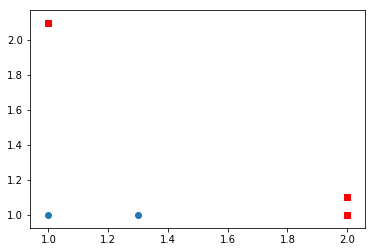

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def load_sim_data():
    dataMat = np.matrix([[1, 2.1],
                        [2., 1.1],
                        [1.3, 1.],
                        [1., 1.],
                        [2., 1.]])
    classLabels = [1., 1., -1., -1., 1.]
    return dataMat, classLabels

def draw_data(data, labels):
    x = np.array(data[:, 0].transpose())[0]
    y = np.array(data[:, 1].transpose())[0]
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for i in range(0, len(labels)):
        if labels[i] == 1:
            x_1.append(x[i])
            y_1.append(y[i])
        else:
            x_2.append(x[i])
            y_2.append(y[i])
    plt.scatter(x_1, y_1, marker='s', c='r')
    plt.scatter(x_2, y_2)
    plt.show()
   

if __name__ == '__main__':
    data, labels = load_sim_data()
    draw_data(data, labels)

In [22]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    """
    使用只有一层的树桩决策树对数据分类
    :param dataMatrix: 数据
    :param dimen: 特征的下标
    :param threshVal: 阙值
    :param threshIneq: 大于或小于
    :return: 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0], 1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray


def buildStump(dataArr, classLabels, D):
    """
    构建决策树
    :param dataArr: 数据
    :param classLabels: 标签
    :param D: 训练数据权重
    :return: 最佳决策树、最小错误率加权和、最优预测结果
    """
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m, 1)))
    minError = np.inf
    for i in range(n):    # 遍历所有特征
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax - rangeMin) / numSteps    # 计算步长
        for j in range(-1, int(numSteps) + 1):     # 遍历区间
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)   # 阙值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)   # 调用树桩决策树分类
                errArr = np.mat(np.ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                #print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:   # 记录最优树桩决策树
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

    
if __name__ == '__main__':
    dataMat, classLabels = load_sim_data()
    D = np.mat(np.ones((5, 1)) / 5)
    bestStump, minError, bestClasEst = buildStump(dataMat, classLabels, D)
    print("bestStump:", bestStump)
    print("bestClasEst:", bestClasEst.T)

bestStump: {'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}
bestClasEst: [[-1.  1. -1. -1.  1.]]


### 回归问题的提升树

回归问题提升树使用前向分步算法:

$$f_0(x)=0$$

$$f_m(x)=f_{m+1}(x) + T(x;θ_m), m = 1, 2, ..., M$$

$$f_M(x)=\sum^M_{m=1}T(x;θ_m)$$

$$\hat{θ_m}=argmin_{θ_m}\sum^N_{i=1}L(y_i,f_{m-1}(x_i)+T(x;θ_m))$$

使用平方误差损失函数时:

$$L(y,f_{m-1}(x)+T(x;θ_m)=[y-f_{m-1}(x)-T(x;θ_m)]^2=[r-T(x;θ_m)]^2$$

r 为当前模型拟合数据的残差。所以对于回归问题的提升树算法只需简单拟合当前模型的残差。

### AdaBoost 算法的训练误差分析

**参考**:
* 统计学习方法
* 机器学习实战